In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
#import hvplot.pandas

raw_listings = pd.read_csv('06 Nov 2020 listings.csv')

In [115]:
print(raw_listings.shape)
raw_listings.head()


(76984, 74)


id                         listing_url     scrape_id last_scraped  \
0  11551  https://www.airbnb.com/rooms/11551  2.020110e+13   07/11/2020   
1  13913  https://www.airbnb.com/rooms/13913  2.020110e+13   07/11/2020   
2  15400  https://www.airbnb.com/rooms/15400  2.020110e+13   07/11/2020   
3  17402  https://www.airbnb.com/rooms/17402  2.020110e+13   06/11/2020   
4  17506  https://www.airbnb.com/rooms/17506  2.020110e+13   07/11/2020   

                                                name  \
0         Arty and Bright London Apartment in Zone 2   
1                Holiday London DB Room Let-on going   
2                Bright Chelsea  Apartment. Chelsea!   
3              Superb 3-Bed/2 Bath & Wifi: Trendy W1   
4  Boutique Chelsea/Fulham Double bed 5-star ensuite   

                                         description  \
0  Unlike most rental apartments out there my fla...   
1  My bright double bedroom with a large window h...   
2  Lots of windows and light.  St Luke's Gardens ...   
3  You'll have a wonderful stay in this superb mo...   
4  Enjoy a chic stay in this elegant but fully mo...   

                               neighborhood_overview  \
0  Not even 10 minutes by metro from Victoria Sta...   
1  Finsbury Park is a friendly melting pot commun...   
2                                     It is Chelsea.   
3  Location, location, location! You won't find b...   
4  Fulham is 'villagey' and residential – a real ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/b7afccf4-18e5...    43039   
1  https://a0.muscache.com/pictures/miso/Hosting-...    54730   
2  https://a0.muscache.com/pictures/428392/462d26...    60302   
3  https://a0.muscache.com/pictures/39d5309d-fba7...    67564   
4  https://a0.muscache.com/pictures/11901327/e63d...    67915   

                                  host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/43039  ...                        10.0   
1  https://www.airbnb.com/users/show/54730  ...                        10.0   
2  https://www.airbnb.com/users/show/60302  ...                        10.0   
3  https://www.airbnb.com/users/show/67564  ...                         9.0   
4  https://www.airbnb.com/users/show/67915  ...                         NaN   

  review_scores_location review_scores_value license instant_bookable  \
0                    9.0                 9.0     NaN                t   
1                    9.0                 9.0     NaN                f   
2                   10.0                 9.0     NaN                t   
3                   10.0                 9.0     NaN                f   
4                    NaN                 NaN     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           2   
1                              2                                           1   
2                              1                                           1   
3                             15                                          15   
4                              2                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            1   
2                                            0   
3                                            0   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.48  
1                                           0              0.17  
2                                           0              0.67  
3                                           0              0.36  
4                                           0               NaN  

[5 rows x 74 columns]

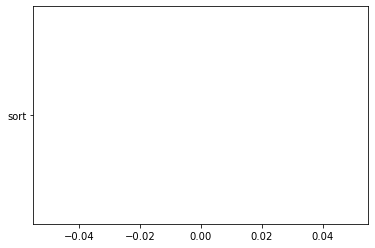

In [116]:
#coefs_df.sort_values('feature', ascending=False)

sort = raw_listings.sort_values('price', ascending=False)

plt.plot('sort')

In [117]:
print(listings.columns.tolist())


['id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'instant_bookable', 'calculated_host_listings_count_private_rooms', 'reviews_per_month', 'days_host_since', 'amenity_Air_conditioning_', 'amenity_Bathtub_', 'amenity_Bed_linens_', 'amenity_Breakfast_', 'amenity_Cable_TV_', 'amenity_Carbon_monoxide_alarm_', 'amenity_Coffee_maker_', 'amenity_Cooking_basics_', 'amenity_Dishes_and_silverware_', 'amenity_Dishwasher_', 'amenity_Dryer_', 'amenity_Elevator_', 'amenity_Essentials_', 'amenity_Extra_pillows_and_blankets_', 'amenity_Fire_extinguisher_', 'amenity_First_aid_kit_', 'amenity_Free_parking_on_premises_', 'amenity_Free_street_parking_', 'amen

In [118]:
listings.describe(include='datetime')

ValueError: No objects to concatenate

In [119]:
listings.head()

id  host_id  host_response_rate  host_acceptance_rate  \
0  11551    43039          100.000000            100.000000   
1  13913    54730           83.000000             71.000000   
2  15400    60302          100.000000            100.000000   
3  17402    67564           67.000000            100.000000   
4  17506    67915           87.645506             81.269505   

   host_is_superhost  host_has_profile_pic  host_identity_verified  latitude  \
0                0.0                   1.0                     1.0  51.46225   
1                0.0                   1.0                     1.0  51.56802   
2                0.0                   1.0                     1.0  51.48796   
3                1.0                   1.0                     1.0  51.52195   
4                0.0                   1.0                     1.0  51.47935   

   longitude  accommodates  ...  room_type_Shared room  \
0   -0.11732             4  ...                      0   
1   -0.11121             2  ...                      0   
2   -0.16898             2  ...                      0   
3   -0.14094             6  ...                      0   
4   -0.19743             2  ...                      0   

   days_since_first_review_cats_1-2 years  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   days_since_first_review_cats_2-3 years  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   days_since_first_review_cats_4+ years  \
0                                      1   
1                                      1   
2                                      1   
3                                      1   
4                                      0   

   days_since_first_review_cats_6-12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   days_since_last_review_cats_1 year  days_since_last_review_cats_2+ years  \
0                                   0                                     0   
1                                   0                                     0   
2                                   0                                     0   
3                                   1                                     0   
4                                   0                                     0   

   days_since_last_review_cats_2-6 months  \
0                                       1   
1                                       1   
2                                       1   
3                                       0   
4                                       0   

   days_since_last_review_cats_2-8 weeks  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   days_since_last_review_cats_6-12 months  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0  

[5 rows x 130 columns]

# Cleaning the Data

In [120]:
to_drop = [
                'listing_url', 'scrape_id', 'name', 'description', 
               'neighborhood_overview', 'picture_url',
               'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 
               'host_verifications', 'neighbourhood', 'neighbourhood_group_cleansed',
               'bathrooms', 'calendar_updated', 'calendar_last_scraped', 
               'license', 'host_picture_url', 
               'host_neighbourhood', 'host_response_time', 'maximum_nights_avg_ntm', 
               'minimum_minimum_nights', 'minimum_maximum_nights',
               'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
               'minimum_nights_avg_ntm', 'has_availability', 'calculated_host_listings_count_shared_rooms'
               ]
    

listings = raw_listings.drop(to_drop, axis=1)
   
# Replace columns with categorical values t and f with 1 and 0
listings = listings.replace({'f': 0, 't': 1})
    
# Lambda function to remove special characters and convert to float
strip_and_convert = lambda col: col.str.extract('(\d+)', expand=False).astype(float, errors='ignore')
    
# strip_and_convert function wil be applied on the below columns
cols_to_numeric = ['host_response_rate', 'host_acceptance_rate', 'bathrooms_text', 'price']
listings[cols_to_numeric] = listings[cols_to_numeric].apply(strip_and_convert)
    
# Rename bathrooms_text column
listings = listings.rename(columns={'bathrooms_text': 'bathrooms'})
listings = listings.dropna(subset=['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified'], axis=0)
    
# Convert to datetime object
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])
listings['host_since'] = pd.to_datetime(listings['host_since'])
    
# Calculoate the difference in days
listings['days_host_since'] = (listings['last_scraped'] - listings['host_since']).dt.days
    
prob = listings['property_type'].value_counts(normalize=True)
    
# Setting a threshold. This threshold means that if the frequency of the property types that is less than this value, they will be categorised as Other
threshold = 0.005
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['Other'] = tail_prob
    
# Replace with Other if the frequency of the category is below set threshold (we set it at 0.005, refer to above) 
listings.loc[~listings['property_type'].isin(prob.index.drop('Other')), 'property_type'] = 'Other'
    
fill_median = lambda col: col.fillna(col.median())
listings[['bathrooms', 'bedrooms', 'beds']] = listings[['bathrooms', 'bedrooms', 'beds']].apply(fill_median)
    
# Convert to datetime object
listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['last_review'] = pd.to_datetime(listings['last_review'])
    
# Calculate number of days between review date and the date the dataset was scrapped
listings['days_since_first_review'] = (listings['last_scraped'] - listings['first_review'])
listings['days_since_last_review'] = (listings['last_scraped'] - listings['last_review'])
bins = pd.to_timedelta([0, 182, 365, 730, 1460, max(listings['days_since_first_review'])], unit='days')
labels = ['0-6 months',
               '6-12 months',
               '1-2 years',
               '2-3 years',
               '4+ years']

def categorise_col(col_name, new_col, bins, labels):

    listings[new_col] = pd.cut(listings[col_name], bins, labels=labels)
    listings[new_col] = listings[new_col].astype('str')
    listings[new_col] = listings[new_col].str.replace('nan', 'No reviews')
    listings[new_col] = listings[new_col].astype('category')
        
categorise_col('days_since_first_review', 'days_since_first_review_cats', bins, labels)
bins2 = pd.to_timedelta([0, 14, 60, 182, 365, 730, max(listings['days_since_last_review'])], unit='days')
labels2 = ['0-2 weeks', '2-8 weeks', '2-6 months', '6-12 months', '1 year', '2+ years']
    
categorise_col('days_since_last_review', 'days_since_last_review_cats', bins=bins2, labels=labels2)
listings['days_since_last_review_cats'].isnull().sum();
    
# Categorising columns out of 10
review_cols_10 = ['review_scores_accuracy',
           'review_scores_cleanliness', 'review_scores_checkin',
           'review_scores_communication', 'review_scores_location',
           'review_scores_value']
new_cols_10 = [s + "_cats" for s in review_cols_10]
bins3 = [0, 8, 9, 10]
labels3 = ['0-8/10', '9/10', '10/10']
    
for i, col in enumerate(review_cols_10):
        categorise_col(col, new_cols_10[i], bins=bins3, labels=labels3)
    
# Categorising column out of 10
categorise_col('review_scores_rating', 'review_scores_rating_cat', 
                   bins=[0, 80, 95, 100], 
                   labels=['0-79/100', '80-94/100', '95-100/100'])
    
## Dealing with outliers in prices
#listings = listings[listings['price'] < 400]


In [121]:
import time
import re
    
def one_hot_encode_amenities(df):
    '''
    INPUT: 
    df - Original dataframe
    OUTPUT: 
    df_amenities - One-hot encoded dataframe of amenities
        
    Create dummies from list of amenities
    
    '''
    def clean_amenities(row):
        '''
        Remove special characters and split the strings
        '''
        row = re.sub('[^A-Za-z,]+', '_', row).split(",")
        return row
        
    df['amenities'] = df['amenities'].apply(clean_amenities)
    
    # Create columns from list of amenities
    df_amenities = df.amenities.str.join('|').str.get_dummies().add_prefix('amenity')
        
    # Include only those amenities that are found in >5% of the listings
    df_amenities = df_amenities[df_amenities.columns[df_amenities.sum() > 0.05 * len(df_amenities)]]
        
    return df_amenities
    
    

In [122]:
amenities_df = one_hot_encode_amenities(listings)
    
#Concatenate dataframes
listings = pd.concat([listings, amenities_df], axis=1)
fill_mean = lambda col: col.fillna(col.mean())
listings[['host_response_rate', 'host_acceptance_rate', 'reviews_per_month']] = listings[['host_response_rate', 'host_acceptance_rate', 'reviews_per_month']].apply(fill_mean)

# One-hot encoding

In [123]:
# Dropping initial and intermidiate columns
review_cols = listings.columns[listings.columns.str.startswith("review_scores")]
listings = listings.drop(review_cols, axis=1)
listings = listings.drop(columns=['last_review', 
                                  'days_since_last_review', 'days_since_first_review', 
                                  'first_review', 'last_scraped', 'amenities', 'host_since', 'host_listings_count'])

# Include all object and category columns
cat_columns = listings.select_dtypes(include=['object', 'category']).columns
for col in cat_columns:    
    listings = pd.concat([listings.drop(col, axis=1), pd.get_dummies(listings[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)   

In [124]:
listings.shape

(76973, 133)

In [125]:
listings.head()

id  host_id  host_response_rate  host_acceptance_rate  \
0  11551    43039          100.000000            100.000000   
1  13913    54730           83.000000             71.000000   
2  15400    60302          100.000000            100.000000   
3  17402    67564           67.000000            100.000000   
4  17506    67915           87.645506             81.269505   

   host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                0.0                        3.0                   1.0   
1                0.0                        3.0                   1.0   
2                0.0                        1.0                   1.0   
3                1.0                       18.0                   1.0   
4                0.0                        3.0                   1.0   

   host_identity_verified  latitude  longitude  ...  room_type_Shared room  \
0                     1.0  51.46225   -0.11732  ...                      0   
1                     1.0  51.56802   -0.11121  ...                      0   
2                     1.0  51.48796   -0.16898  ...                      0   
3                     1.0  51.52195   -0.14094  ...                      0   
4                     1.0  51.47935   -0.19743  ...                      0   

   days_since_first_review_cats_1-2 years  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   days_since_first_review_cats_2-3 years  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   days_since_first_review_cats_4+ years  \
0                                      1   
1                                      1   
2                                      1   
3                                      1   
4                                      0   

   days_since_first_review_cats_6-12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   days_since_last_review_cats_1 year  days_since_last_review_cats_2+ years  \
0                                   0                                     0   
1                                   0                                     0   
2                                   0                                     0   
3                                   1                                     0   
4                                   0                                     0   

   days_since_last_review_cats_2-6 months  \
0                                       1   
1                                       1   
2                                       1   
3                                       0   
4                                       0   

   days_since_last_review_cats_2-8 weeks  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   days_since_last_review_cats_6-12 months  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0  

[5 rows x 133 columns]

In [126]:
listings.describe()

id       host_id  host_response_rate  host_acceptance_rate  \
count  7.697300e+04  7.697300e+04        76973.000000          76973.000000   
mean   2.562674e+07  9.517655e+07           87.645506             81.269505   
std    1.319035e+07  1.001762e+08           18.522269             22.353138   
min    1.155100e+04  2.010000e+03            0.000000              0.000000   
25%    1.509269e+07  1.612489e+07           87.645506             81.269505   
50%    2.585350e+07  4.947226e+07           87.645506             81.269505   
75%    3.761152e+07  1.529600e+08          100.000000             99.000000   
max    4.626152e+07  3.745225e+08          100.000000            100.000000   

       host_is_superhost  host_total_listings_count  host_has_profile_pic  \
count       76973.000000               76973.000000          76973.000000   
mean            0.145103                  23.595884              0.996012   
std             0.352207                 124.361055              0.063028   
min             0.000000                   0.000000              0.000000   
25%             0.000000                   1.000000              1.000000   
50%             0.000000                   1.000000              1.000000   
75%             0.000000                   3.000000              1.000000   
max             1.000000                1490.000000              1.000000   

       host_identity_verified      latitude     longitude  ...  \
count            76973.000000  76973.000000  76973.000000  ...   
mean                 0.762748     51.509932     -0.128258  ...   
std                  0.425401      0.047513      0.094813  ...   
min                  0.000000     51.283370     -0.496870  ...   
25%                  1.000000     51.484140     -0.188630  ...   
50%                  1.000000     51.514030     -0.126000  ...   
75%                  1.000000     51.539240     -0.069490  ...   
max                  1.000000     51.685230      0.288570  ...   

       room_type_Shared room  days_since_first_review_cats_1-2 years  \
count           76973.000000                            76973.000000   
mean                0.008068                                0.168007   
std                 0.089458                                0.373875   
min                 0.000000                                0.000000   
25%                 0.000000                                0.000000   
50%                 0.000000                                0.000000   
75%                 0.000000                                0.000000   
max                 1.000000                                1.000000   

       days_since_first_review_cats_2-3 years  \
count                            76973.000000   
mean                                 0.232159   
std                                  0.422213   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       days_since_first_review_cats_4+ years  \
count                           76973.000000   
mean                                0.135541   
std                                 0.342303   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       days_since_first_review_cats_6-12 months  \
count                              76973.000000   
mean                                   0.099892   
std                                    0.299858   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       days_since_last_review_ca

In [127]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76973 entries, 0 to 76983
Columns: 133 entries, id to days_since_last_review_cats_6-12 months
dtypes: float64(13), int64(64), uint8(56)
memory usage: 49.9 MB


In [129]:
listings.columns.tolist()

['id',
 'host_id',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'reviews_per_month',
 'days_host_since',
 'amenity_Air_conditioning_',
 'amenity_Bathtub_',
 'amenity_Bed_linens_',
 'amenity_Breakfast_',
 'amenity_Cable_TV_',
 'amenity_Carbon_monoxide_alarm_',
 'amenity_Coffee_maker_',
 'amenity_Cooking_basics_',
 'amenity_Dishes_and_silverware_',
 'amenity_Dishwasher_',
 'amenity_Dryer_',
 'amenity_Elevator_',
 'amenity_Essentials_',
 'amenity_Extra_p

In [ ]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [ ]:


head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

In [ ]:
listings.to_csv('cleaned_listings.csv') 

In [ ]:
#sns.pairplot(listings)
listings.head()

In [ ]:
listings.price.describe()

In [ ]:
listings.price.quantile(1)

In [ ]:
listings.price.quantile(0.99)

Text(0.5, 1.0, 'Correlation Heatmap')

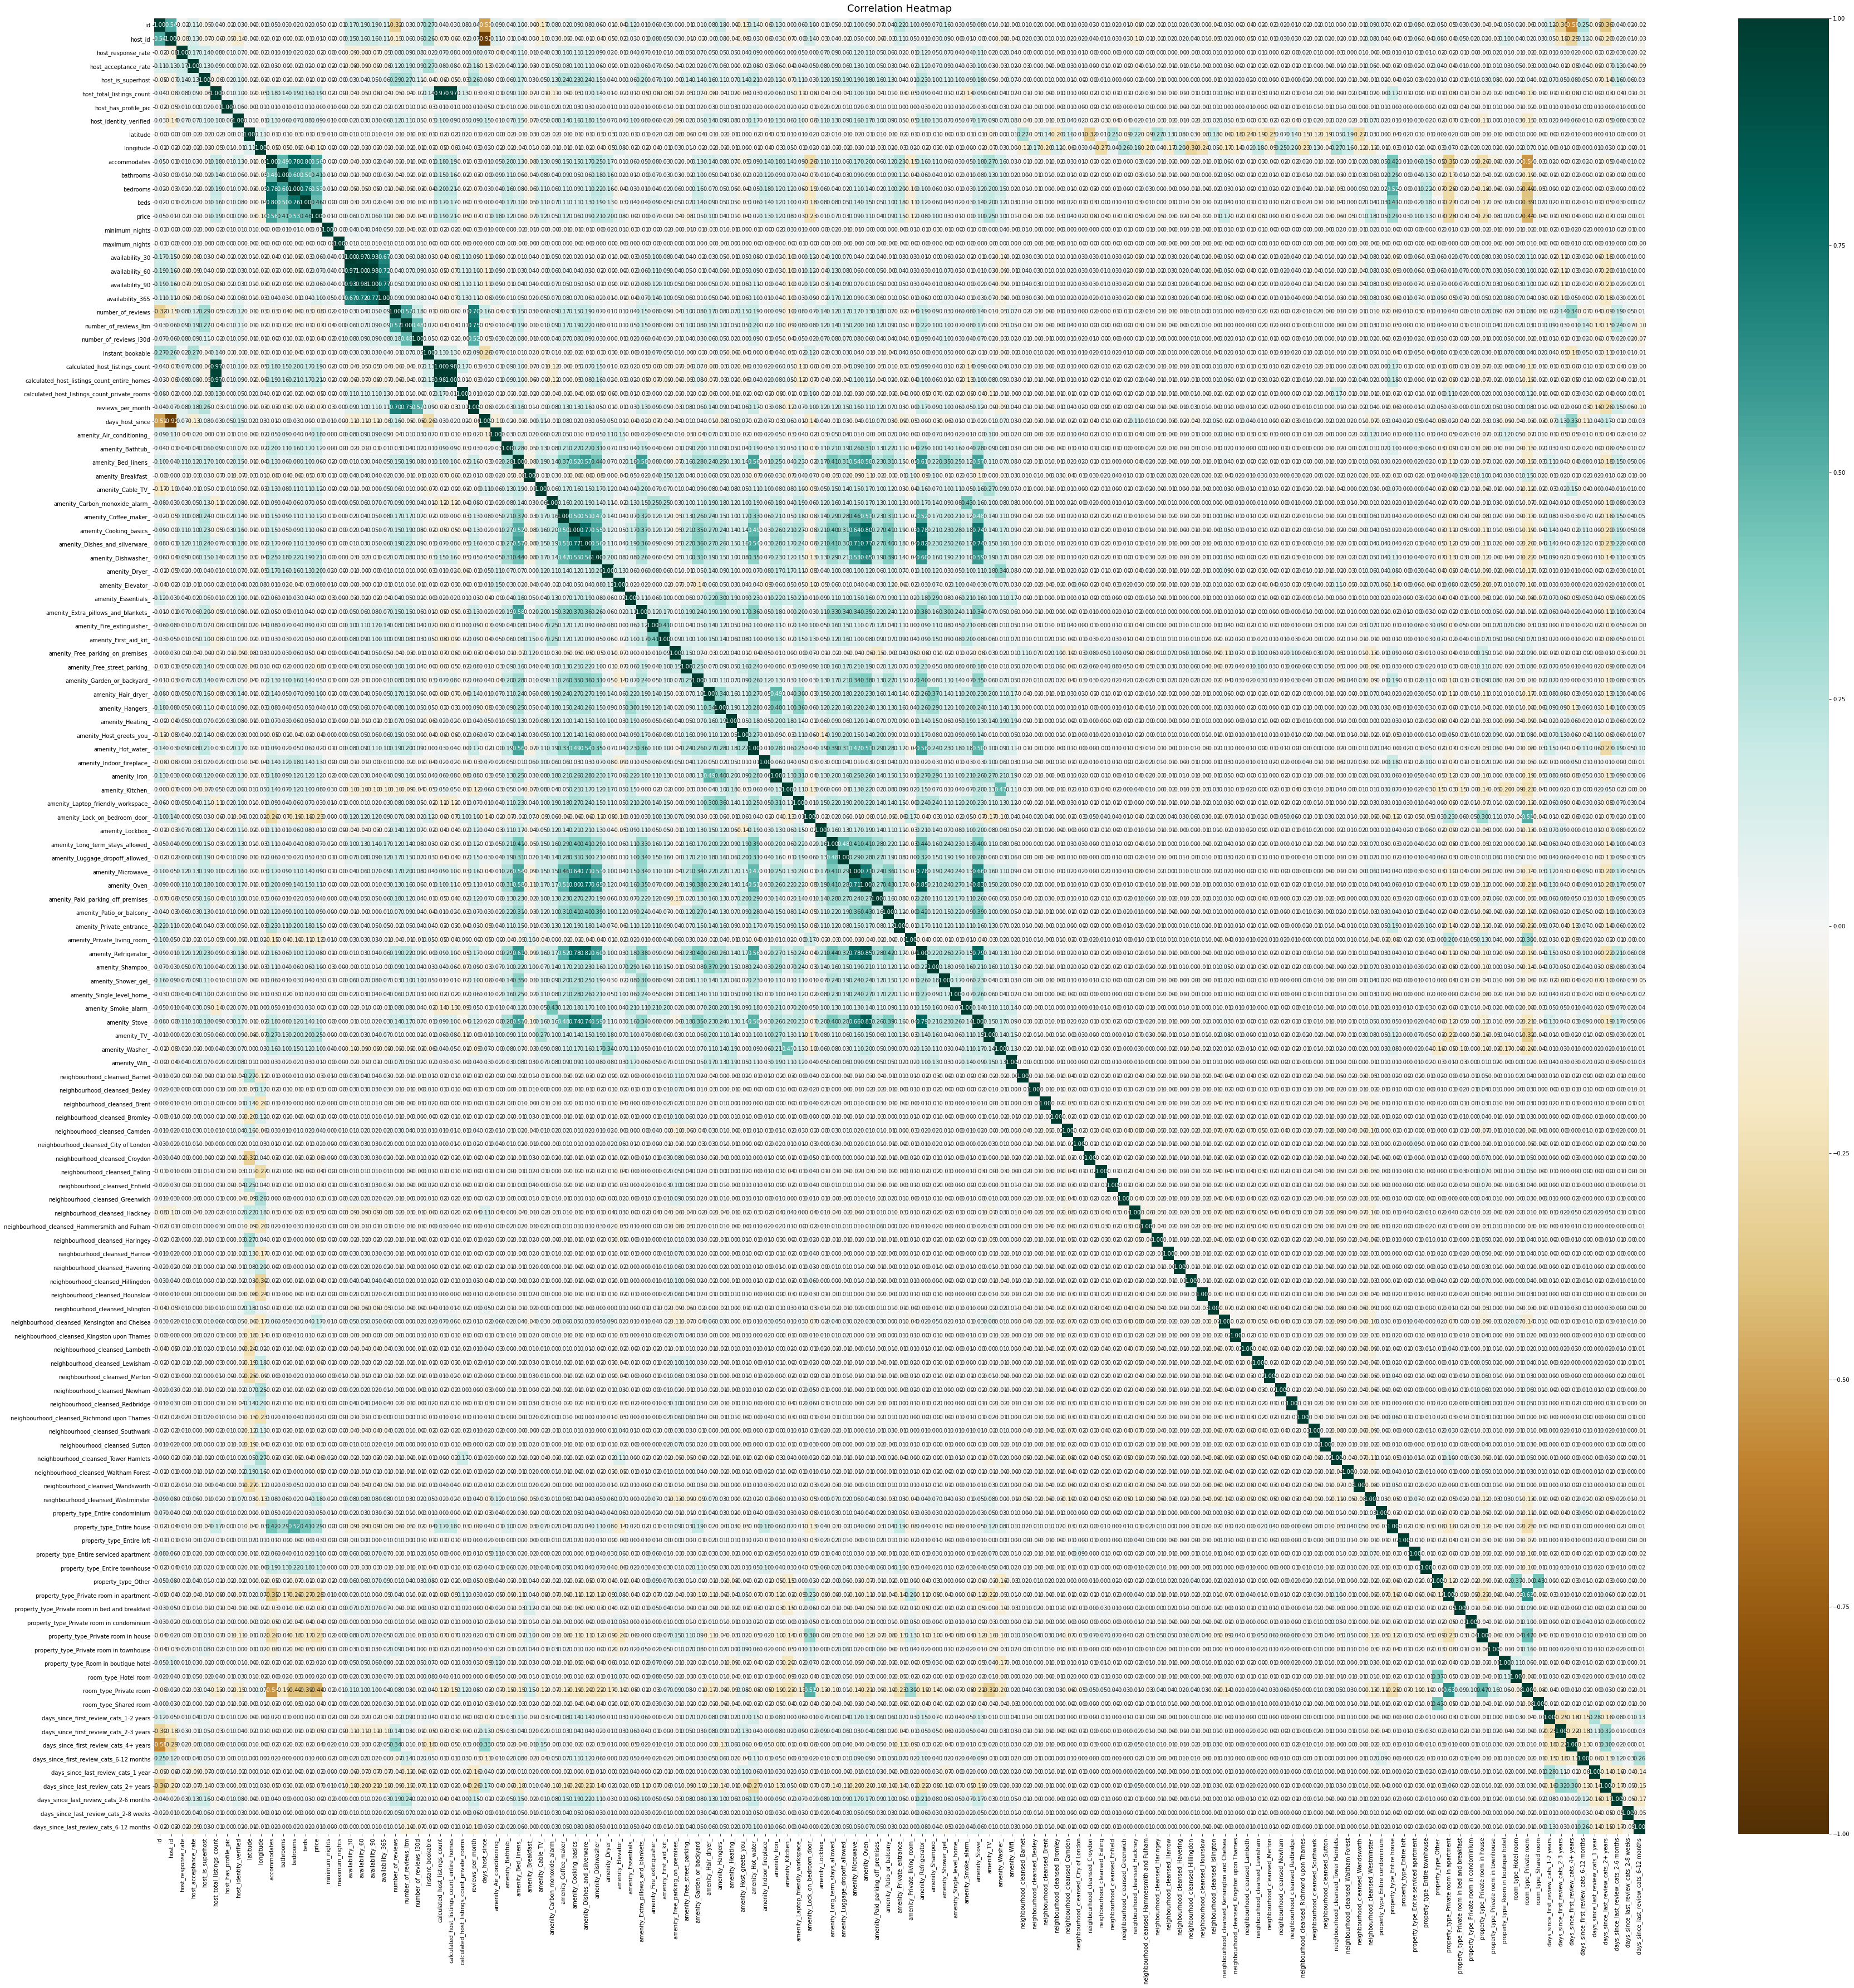

In [130]:
plt.figure(figsize=(60, 60))
corrs = listings.corr();

# Show only price feature
heatmap = sns.heatmap(corrs, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

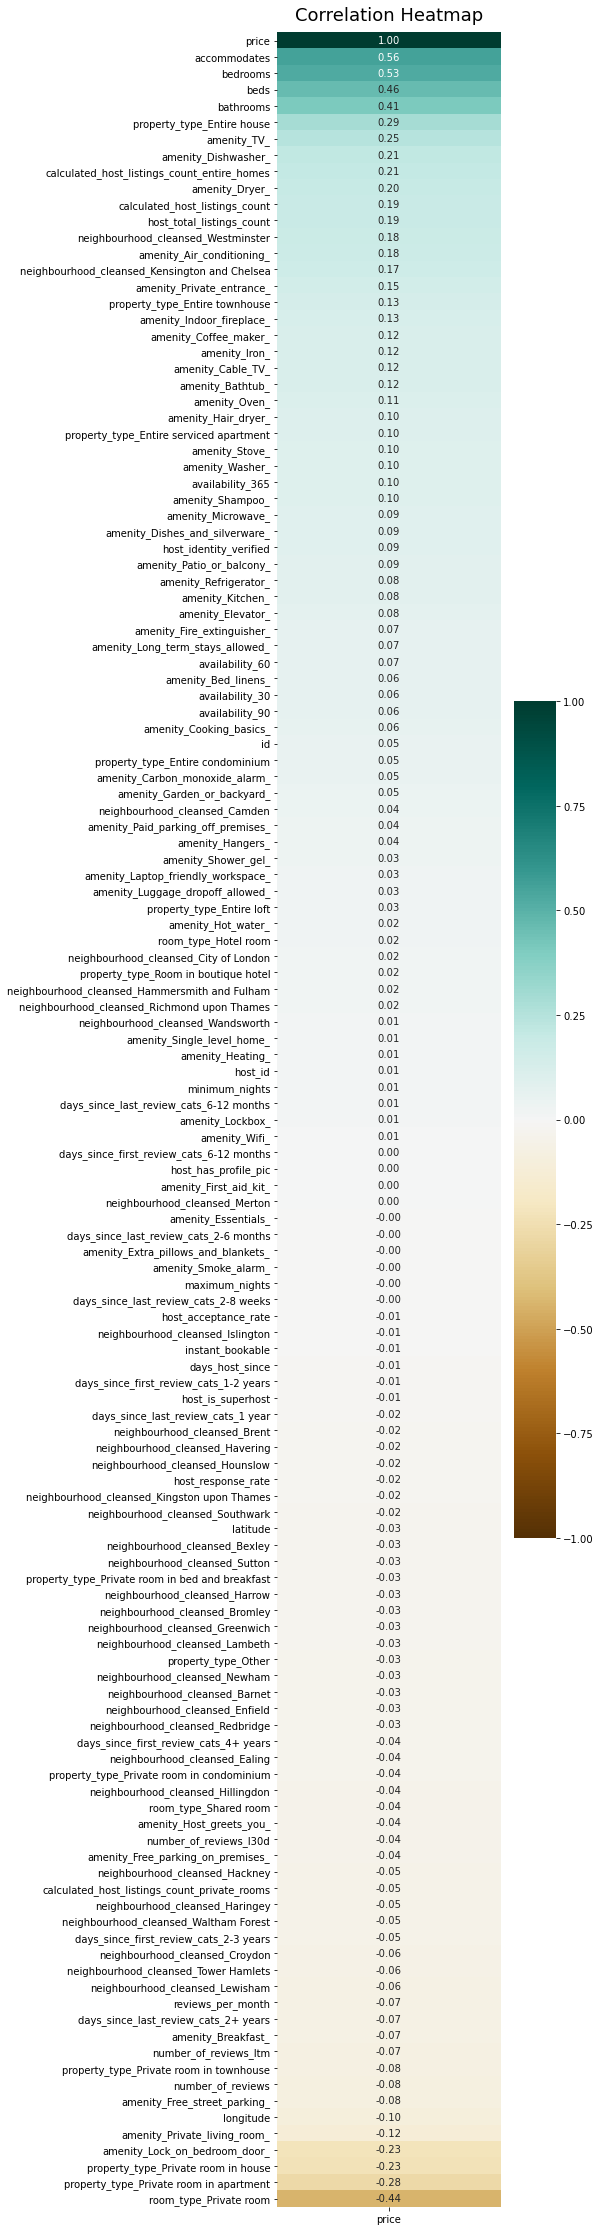

In [132]:
plt.figure(figsize=(5, 40))
feature_correlation = listings.corr()[['price']].sort_values(by='price', ascending=False)
# feature_correlation = feature_correlation[(feature_correlation > 0.1) & (feature_correlation != 1)]
# Show all features.
# heatmap = sns.heatmap(feature_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')

# Show only price feature
heatmap = sns.heatmap(feature_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
listings = listings.drop(['host_listings_count', 'host_total_listings_count'], axis=1)

In [135]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


feature_correlation_price = abs(feature_correlation['price'])
mask = (feature_correlation_price > 0.10) & (feature_correlation_price < 0.95) & (feature_correlation_price != 1)

# Columns to keep
columns_to_keep = list(feature_correlation_price[mask].index)

final_listings = listings[columns_to_keep]

# Improve performance of ML algorithm due to smaller values. ML algorithms see larger numbers as more impactful.
final_listings_scaled = MinMaxScaler().fit_transform(final_listings)
final_listings_scaled_df = pd.DataFrame(final_listings_scaled, columns=final_listings.columns)
final_listings_scaled_df.head()

# Visualize cleaned dataset
final_listings_corr = final_listings_scaled_df.corr()

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(final_listings_corr.values, i) for i in range(final_listings_corr.shape[1])]
vif["features"] = final_listings_corr.columns
vif = vif.round(1)

pd.set_option('max_rows', None)
display(vif.sort_values('VIF', ascending=False))

VIF                                       features
9   10696.9                 calculated_host_listings_count
7    6978.3    calculated_host_listings_count_entire_homes
10   2177.1                      host_total_listings_count
29    189.2                         room_type_Private room
0      88.3                                   accommodates
28     75.2        property_type_Private room in apartment
1      71.5                                       bedrooms
21     67.7                                  amenity_Oven_
24     50.8                                 amenity_Stove_
2      47.3                                           beds
27     42.3            property_type_Private room in house
6      13.2                            amenity_Dishwasher_
3       7.8                                      bathrooms
4       6.0                     property_type_Entire house
26      5.3                  amenity_Lock_on_bedroom_door_
17      5.1                          amenity_Coffee_maker_
18      4.7                                  amenity_Iron_
22      4.0                            amenity_Hair_dryer_
5       3.7                                    amenity_TV_
20      2.3                               amenity_Bathtub_
14      2.1                      amenity_Private_entrance_
19      1.9                              amenity_Cable_TV_
8       1.9                                 amenity_Dryer_
25      1.8                   amenity_Private_living_room_
13      1.7  neighbourhood_cleansed_Kensington and Chelsea
15      1.7                 property_type_Entire townhouse
16      1.5                      amenity_Indoor_fireplace_
11      1.4             neighbourhood_cleansed_Westminster
12      1.3                      amenity_Air_conditioning_
23      1.2        property_type_Entire serviced apartment

# Fitting the Linear Regression model to predict price

In [84]:
#Perform Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )

print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))



        R2 for test data: 0.47096051271062955
        R2 for train data: 0.47578414083005294
        
        RMSE for test data: 68.90024428793005
        RMSE for train data: 68.6478235962039
        
        Mean Absolute Error for test data: 38.47029139154331
        Mean Absolute Error for train data: 37.976704000094934
    


In [85]:
print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))

	Explained variance: 0.4709677791765473
	Mean absolute error: 38.47029139154331
	R2 score: 0.47096051271062955


# Fitting the Gradient Boosting Regression model to predict price

In [86]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = GradientBoostingRegressor(random_state=0) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )



print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))


        R2 for test data: 0.5211314999586214
        R2 for train data: 0.5501892621334634
        
        RMSE for test data: 65.29214959219748
        RMSE for train data: 63.70581430143095
        
        Mean Absolute Error for test data: 34.676486403356016
        Mean Absolute Error for train data: 33.813819806012695
    
	Explained variance: 0.521139439916147
	Mean absolute error: 34.676486403356016
	R2 score: 0.5211314999586214


# Price Prediction using XGBoost

In [87]:
import xgboost
from xgboost import plot_importance

X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = xgboost.XGBRegressor() # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)


test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))


        R2 for test data: 0.5898379887830136
        R2 for train data: 0.7843850467059867
        
        RMSE for test data: 60.42693257566465
        RMSE for train data: 44.10660195674622
        
        Mean Absolute Error for test data: 31.79550978343075
        Mean Absolute Error for train data: 25.58778742556826
    
	Explained variance: 0.5898506059330475
	Mean absolute error: 31.79550978343075
	R2 score: 0.5898379887830136


# Analysis:

Of the 3 models, XGBoost has the lowest error. However, the generalisation for XGBoost is the worst.




# Why?

In [90]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = xgboost.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=6, n_estimators=200, random_state=4) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)


test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))


        R2 for test data: 0.5978338858437842
        R2 for train data: 0.7497738465281185
        
        RMSE for test data: 59.835037750070356
        RMSE for train data: 47.51497574814371
        
        Mean Absolute Error for test data: 31.065266615460295
        Mean Absolute Error for train data: 26.570869910706723
    
	Explained variance: 0.5978738480429284
	Mean absolute error: 31.065266615460295
	R2 score: 0.5978338858437842


# GridSearch for XGBoost

In [92]:
from sklearn.model_selection import GridSearchCV

X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = xgboost.XGBRegressor()

# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(lm_model, param_grid, cv=3, n_jobs=-1) # n_jobs is the number of cores. So I should do 1 or 2 so that it will not use all the core.

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

{'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


# Returns the following result:
    {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

Start time for above gridsearch is 4.49pm on 24th Nov and returned result at 7.07pm

# Using the best estimator parameters from Grid Search

In [94]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = xgboost.XGBRegressor(colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=200) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)


test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))


        R2 for test data: 0.6116862176999539
        R2 for train data: 0.8113090723790194
        
        RMSE for test data: 58.79551983240399
        RMSE for train data: 41.26099263051627
        
        Mean Absolute Error for test data: 30.56221232361796
        Mean Absolute Error for train data: 23.87194336800996
    
	Explained variance: 0.6117347582937875
	Mean absolute error: 30.56221232361796
	R2 score: 0.6116862176999539


In [99]:
listings.shape

(76973, 133)

In [101]:
listings.columns.to_list()

['id',
 'host_id',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'reviews_per_month',
 'days_host_since',
 'amenity_Air_conditioning_',
 'amenity_Bathtub_',
 'amenity_Bed_linens_',
 'amenity_Breakfast_',
 'amenity_Cable_TV_',
 'amenity_Carbon_monoxide_alarm_',
 'amenity_Coffee_maker_',
 'amenity_Cooking_basics_',
 'amenity_Dishes_and_silverware_',
 'amenity_Dishwasher_',
 'amenity_Dryer_',
 'amenity_Elevator_',
 'amenity_Essentials_',
 'amenity_Extra_p

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.

We found the following three features have very high measure of multicollinearity:

calculated_host_listings_count

calculated_host_listings_count_entire_homes

host_total_listings_count


We will try to remove the following features to check if the results improve.

In [102]:
listings = listings.drop(['host_total_listings_count'], axis=1)

In [103]:
#Perform Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )

print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))


        R2 for test data: 0.4709088171830753
        R2 for train data: 0.4757583716069781
        
        RMSE for test data: 68.90361052764847
        RMSE for train data: 68.64951085853055
        
        Mean Absolute Error for test data: 38.47764098102821
        Mean Absolute Error for train data: 37.98484692968769
    
	Explained variance: 0.4709163069616279
	Mean absolute error: 38.47764098102821
	R2 score: 0.4709088171830753


In [104]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = GradientBoostingRegressor(random_state=0) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )



print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))


        R2 for test data: 0.5201935614604629
        R2 for train data: 0.5487845982386343
        
        RMSE for test data: 65.35606073171456
        RMSE for train data: 63.8052066654774
        
        Mean Absolute Error for test data: 34.65374913158848
        Mean Absolute Error for train data: 33.81002405641049
    
	Explained variance: 0.5202019281752135
	Mean absolute error: 34.65374913158848
	R2 score: 0.5201935614604629


In [105]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = xgboost.XGBRegressor() # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)


test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))


        R2 for test data: 0.5893092553680908
        R2 for train data: 0.7849007669816838
        
        RMSE for test data: 60.46586773749714
        RMSE for train data: 44.053822020654074
        
        Mean Absolute Error for test data: 31.890704626536905
        Mean Absolute Error for train data: 25.683431302217794
    
	Explained variance: 0.5893297217475573
	Mean absolute error: 31.890704626536905
	R2 score: 0.5893092553680908


In [106]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = xgboost.XGBRegressor(colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=200) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)


test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))


        R2 for test data: 0.6059784600152998
        R2 for train data: 0.8086482206785588
        
        RMSE for test data: 59.22605613983664
        RMSE for train data: 41.55089802340637
        
        Mean Absolute Error for test data: 30.709469069467197
        Mean Absolute Error for train data: 24.006027153474125
    
	Explained variance: 0.6060196538013083
	Mean absolute error: 30.709469069467197
	R2 score: 0.6059784600152998


In [107]:
listings = listings.drop(['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes'], axis=1)

In [108]:
listings.shape

(76973, 130)

In [109]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )

print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))


        R2 for test data: 0.46914825687255
        R2 for train data: 0.47169775895621247
        
        RMSE for test data: 69.01815431424018
        RMSE for train data: 68.91486689131682
        
        Mean Absolute Error for test data: 38.662077085278305
        Mean Absolute Error for train data: 38.28277481676542
    
	Explained variance: 0.46915909558059876
	Mean absolute error: 38.662077085278305
	R2 score: 0.46914825687255


In [110]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = GradientBoostingRegressor(random_state=0) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )



print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))


        R2 for test data: 0.5149467523933117
        R2 for train data: 0.5437251956523382
        
        RMSE for test data: 65.71243194798814
        RMSE for train data: 64.16192802672114
        
        Mean Absolute Error for test data: 34.92255124857549
        Mean Absolute Error for train data: 34.09090348201663
    
	Explained variance: 0.5149600644413597
	Mean absolute error: 34.92255124857549
	R2 score: 0.5149467523933117


In [111]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = xgboost.XGBRegressor() # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)


test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))


        R2 for test data: 0.5748485905074279
        R2 for train data: 0.7865819816971237
        
        RMSE for test data: 61.521178119564546
        RMSE for train data: 43.88132204934289
        
        Mean Absolute Error for test data: 32.335754813266014
        Mean Absolute Error for train data: 25.667358637561023
    
	Explained variance: 0.5749095719507994
	Mean absolute error: 32.335754813266014
	R2 score: 0.5748485905074279


In [112]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = xgboost.XGBRegressor(colsample_bytree=0.6, gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=200) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)


test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))


        R2 for test data: 0.6054218398243196
        R2 for train data: 0.8043500250809758
        
        RMSE for test data: 59.26787464584503
        RMSE for train data: 42.014970240525955
        
        Mean Absolute Error for test data: 31.002693131591858
        Mean Absolute Error for train data: 24.255152951446235
    
	Explained variance: 0.6054977554785557
	Mean absolute error: 31.002693131591858
	R2 score: 0.6054218398243196


# Analysis:

There isn't much improvement from removing the features with the highest measure of multicollinearity. 

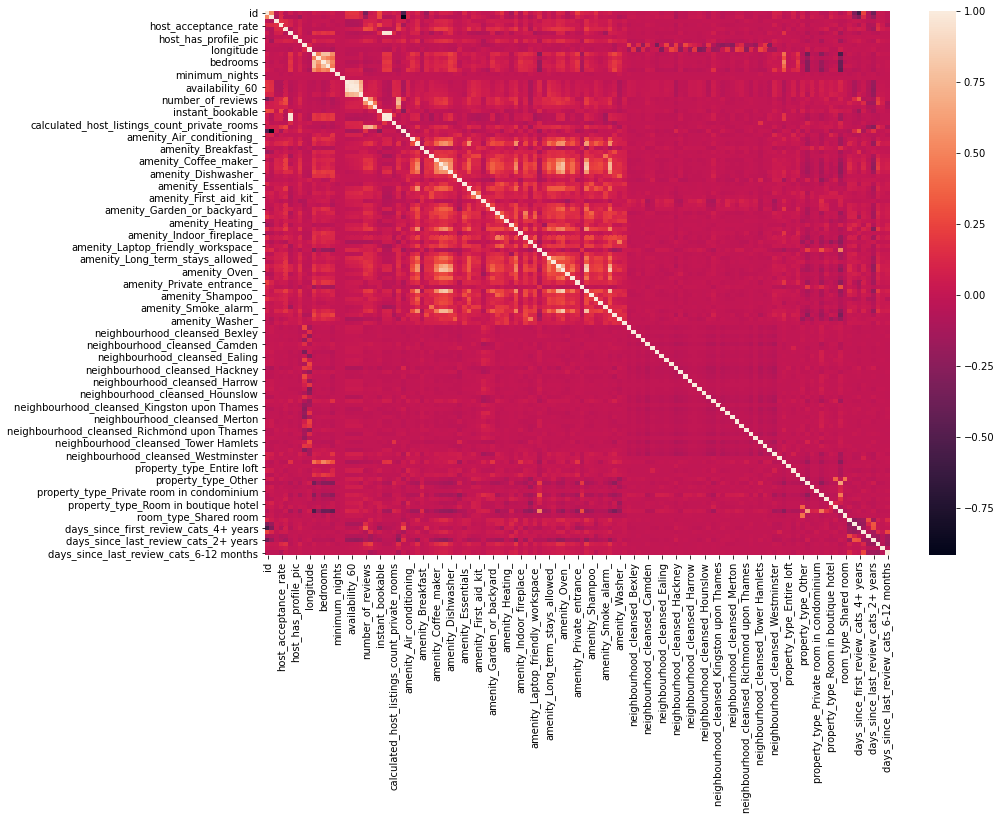

In [9]:
'''The Seaborn Heatmap function can be used to plot a Correlation chart of all variables'''
plt.figure(figsize=(70,70))
corrs = listings.corr();
sns.heatmap(corrs);

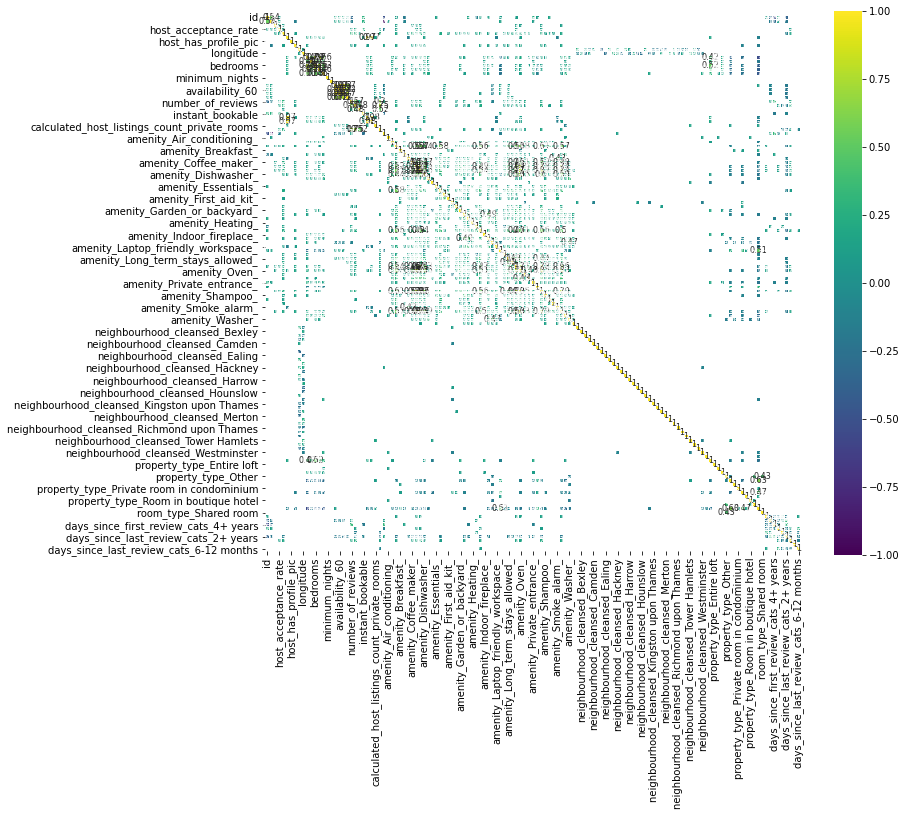

In [40]:
corr = listings.corr();
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(listings)

PCA(n_components=2)

In [80]:
print(pca.components_)

[[ 7.14615864e-02  9.97443340e-01 -1.39206596e-08  2.95993214e-08
  -2.24305296e-10 -7.27468366e-08 -3.32743847e-11 -5.91289030e-10
  -1.80141494e-12 -1.39918404e-11 -1.15323666e-10 -9.10445106e-12
  -2.56212705e-10 -5.45017918e-11 -8.48685901e-09 -3.17170844e-10
  -1.59611347e-04  2.03109719e-08  4.21699447e-08  6.50429618e-08
   1.61816602e-07 -5.33474587e-08  3.35563133e-09  3.72175865e-10
   1.27597617e-09 -6.08026409e-08 -5.56246549e-08 -3.58911400e-09
   5.83201591e-10 -7.73697485e-06  2.63506240e-10 -2.04048010e-11
   2.25696998e-10  9.73503111e-12 -3.60993249e-10  1.32805300e-10
  -2.06500836e-10 -1.72539613e-12 -3.51950415e-11 -1.43683291e-10
  -2.21346527e-10 -1.04473768e-10  8.74003528e-11 -3.85066412e-11
   3.73664460e-10  2.33058248e-10  1.26792339e-10 -2.12912732e-11
  -1.10686849e-10 -1.78487924e-12  3.29806477e-10 -8.70753564e-11
  -2.80298743e-10  1.98865896e-10 -1.62026404e-10  1.53990050e-10
  -1.97508589e-10  7.82616451e-12  5.31786701e-10 -9.94477586e-11
   1.55307

In [104]:
print(pca.explained_variance_)

[1.00858804e+16 1.23368572e+14]


In [105]:
print(pca.explained_variance_ratio_)

[0.98631503 0.01206442]


# PCA without removing outliers in price.

(76973, 2)


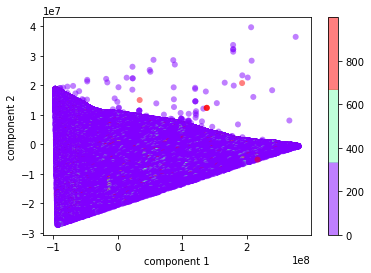

In [106]:
projected = pca.fit_transform(listings)
print(projected.shape)

# plot this PCA projection
plt.scatter(projected[:, 0], projected[:, 1], c=listings['price'],
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show;

# PCA after removing outliers @ price > 400

(75487, 2)


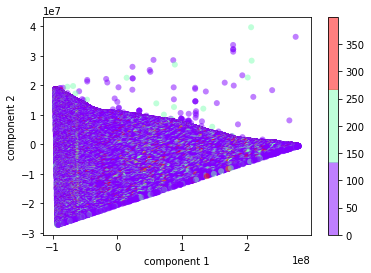

In [87]:
projected = pca.fit_transform(listings)
print(projected.shape)

# plot this PCA projection
plt.scatter(projected[:, 0], projected[:, 1], c=listings['price'],
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show;

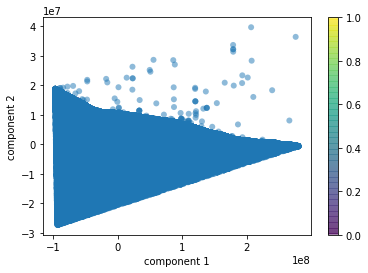

In [107]:
# plot this PCA projection
plt.scatter(projected[:, 0], projected[:, 1],
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show;

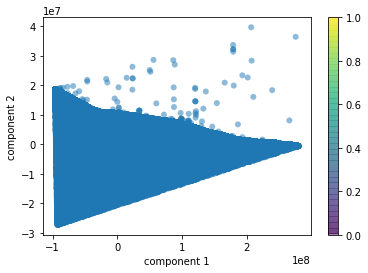

In [88]:
# plot this PCA projection
plt.scatter(projected[:, 0], projected[:, 1],
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show;

(76973, 10)


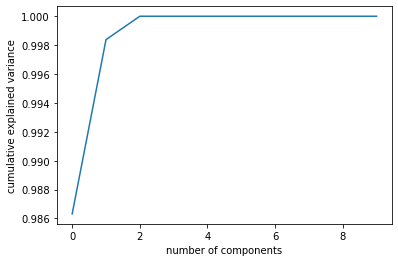

In [38]:


pca = PCA(n_components=10)
pca.fit(X)

projected = pca.fit_transform(listings)
print(projected.shape)

#plot explained varianace against components
plt.figure
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()
plt.close()

(76973, 10)


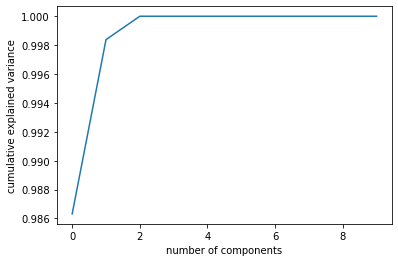

In [39]:
from sklearn.decomposition import PCA
X = listings.drop('price', axis=1)

pca = PCA(n_components=10)
pca.fit(X)

projected = pca.fit_transform(listings)
print(projected.shape)

#plot explained varianace against components
plt.figure
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()
plt.close()



(76973, 5)


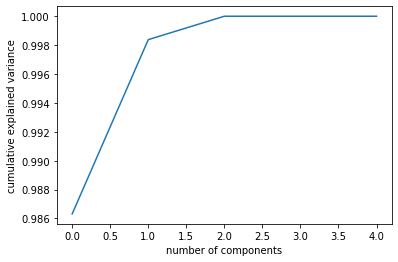

In [113]:
pca = PCA(n_components=5)
pca.fit(listings)

projected = pca.fit_transform(listings)
print(projected.shape)

#plot explained varianace against components
plt.figure
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()
plt.close()

(76973, 3)


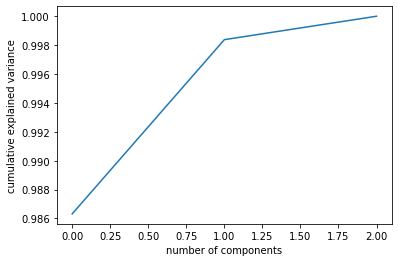

In [115]:
pca = PCA(n_components=3)
pca.fit(listings)

projected = pca.fit_transform(listings)
print(projected.shape)

#plot explained varianace against components
plt.figure
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()
plt.close()

(76973, 2)


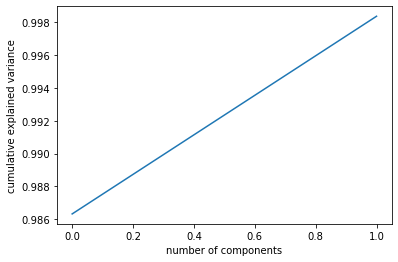

In [116]:
pca = PCA(n_components=2)
pca.fit(listings)

projected = pca.fit_transform(listings)
print(projected.shape)

#plot explained varianace against components
plt.figure
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()
plt.close()

In [ ]:
get_params(deep=True)

In [ ]:
#Map for list Average Price

plt.figure(figsize=(15,10),dpi=200),

listing_map=listings.plot(kind='scatter', x='longitude', y='latitude', c='price', 
                                      cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Airbnb Properties by Price/Night")

plt.show()

In [ ]:
#Map for list Average Price

plt.figure(figsize=(15,10),dpi=200),

listing_map=listings.plot(kind='scatter', x='longitude', y='latitude', c='price', 
                                      cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4,figsize=(15,10))
plt.title("Airbnb Properties by Price/Night")

plt.show()

In [12]:
from sklearn.ensemble import RandomForestRegressor


'''
A Random Forest Regressor is trained on the input values, to predict Price.

Predictions are made on both training and testing.
'''
l_X, l_y = listings.drop('price', axis=1), listings['price'];
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.33, random_state=1024);

rf_classifier = RandomForestRegressor(n_estimators=100, max_depth=20, criterion='mse', random_state=1024);
rf_classifier.fit(l_X_train, l_y_train)

l_y_pred = rf_classifier.predict(l_X_test);
l_y_pred_tr = rf_classifier.predict(l_X_train);

In [17]:
test_r2 = r2_score(l_y_test, l_y_pred)
train_r2 = r2_score(l_y_train, l_y_pred_tr)
test_rmse = mean_squared_error(l_y_test, l_y_pred) ** (1/2)
train_rmse = mean_squared_error(l_y_train, l_y_pred_tr) ** (1/2)

test_mae = mean_absolute_error(l_y_test, l_y_pred)
train_mae = mean_absolute_error(l_y_train, l_y_pred_tr)


print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


        R2 for test data: 0.5841472370407268
        R2 for train data: 0.9131886073061956
        
        RMSE for test data: 61.67764289528763
        RMSE for train data: 27.806847941967717
        
        Mean Absolute Error for test data: 32.48947530307361
        Mean Absolute Error for train data: 17.007608203872707
    


In [19]:
from sklearn.decomposition import PCA


'''A PCA model is fitted for 60 components on the training data.'''
pca = PCA(n_components=60, random_state=1024);
pca.fit(l_X)

PCA(n_components=60, random_state=1024)

In [29]:
pca = PCA(n_components=70, random_state=1024);
pca.fit(l_X)

PCA(n_components=70, random_state=1024)

In [30]:
listings_pca = pca.transform(l_X);
l_X_p_train, l_X_p_test, l_y_p_train, l_y_p_test = train_test_split(listings_pca, l_y, test_size=0.33, random_state=1024)    

In [31]:
rf_classifier_2 = RandomForestRegressor(n_estimators=100, max_depth=40, criterion='mse', random_state=1024);
rf_classifier_2.fit(l_X_p_train, l_y_p_train)

l_y_p_pred = rf_classifier_2.predict(l_X_p_test);
l_y_p_pred_tr = rf_classifier_2.predict(l_X_p_train);

In [ ]:

test_r2 = r2_score(l_y_p_test, l_y_p_pred)
train_r2 = r2_score(l_y_p_train, l_y_p_pred_tr)
test_rmse = mean_squared_error(l_y_p_test, l_y_p_pred) ** (1/2)
train_rmse = mean_squared_error(l_y_p_train, l_y_p_pred_tr) ** (1/2)

test_mae = mean_absolute_error(l_y_p_test, l_y_p_pred)
train_mae = mean_absolute_error(l_y_p_train, l_y_p_pred_tr)


print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )




In [ ]:
test_r2 = r2_score(l_y_p_test, l_y_p_pred)
train_r2 = r2_score(l_y_p_train, l_y_p_pred_tr)
test_rmse = mean_squared_error(l_y_p_test, l_y_p_pred) ** (1/2)
train_rmse = mean_squared_error(l_y_p_train, l_y_p_pred_tr) ** (1/2)

test_mae = mean_absolute_error(l_y_p_test, l_y_p_pred)
train_mae = mean_absolute_error(l_y_p_train, l_y_p_pred_tr)


print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )

In [ ]:
test_r2 = r2_score(l_y_p_test, l_y_p_pred)
train_r2 = r2_score(l_y_p_train, l_y_p_pred_tr)
test_rmse = mean_squared_error(l_y_p_test, l_y_p_pred) ** (1/2)
train_rmse = mean_squared_error(l_y_p_train, l_y_p_pred_tr) ** (1/2)

test_mae = mean_absolute_error(l_y_p_test, l_y_p_pred)
train_mae = mean_absolute_error(l_y_p_train, l_y_p_pred_tr)


print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )

In [ ]:
test_r2 = r2_score(l_y_p_test, l_y_p_pred)
train_r2 = r2_score(l_y_p_train, l_y_p_pred_tr)
test_rmse = mean_squared_error(l_y_p_test, l_y_p_pred) ** (1/2)
train_rmse = mean_squared_error(l_y_p_train, l_y_p_pred_tr) ** (1/2)

test_mae = mean_absolute_error(l_y_p_test, l_y_p_pred)
train_mae = mean_absolute_error(l_y_p_train, l_y_p_pred_tr)


print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )

In [32]:
#70 components

test_r2 = r2_score(l_y_p_test, l_y_p_pred)
train_r2 = r2_score(l_y_p_train, l_y_p_pred_tr)
test_rmse = mean_squared_error(l_y_p_test, l_y_p_pred) ** (1/2)
train_rmse = mean_squared_error(l_y_p_train, l_y_p_pred_tr) ** (1/2)

test_mae = mean_absolute_error(l_y_p_test, l_y_p_pred)
train_mae = mean_absolute_error(l_y_p_train, l_y_p_pred_tr)


print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


        R2 for test data: 0.5009951671774691
        R2 for train data: 0.9289805260465092
        
        RMSE for test data: 67.56322138350455
        RMSE for train data: 25.150818652252504
        
        Mean Absolute Error for test data: 37.34439245554988
        Mean Absolute Error for train data: 13.919457866669742
    


In [28]:
#10 components:

test_r2 = r2_score(l_y_p_test, l_y_p_pred)
train_r2 = r2_score(l_y_p_train, l_y_p_pred_tr)
test_rmse = mean_squared_error(l_y_p_test, l_y_p_pred) ** (1/2)
train_rmse = mean_squared_error(l_y_p_train, l_y_p_pred_tr) ** (1/2)

test_mae = mean_absolute_error(l_y_p_test, l_y_p_pred)
train_mae = mean_absolute_error(l_y_p_train, l_y_p_pred_tr)


print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


        R2 for test data: 0.22844689651667305
        R2 for train data: 0.8897456872516475
        
        RMSE for test data: 84.01191489010098
        RMSE for train data: 31.337272453385495
        
        Mean Absolute Error for test data: 52.520074075620236
        Mean Absolute Error for train data: 19.57403488058938
    


In [23]:
#60 components:

test_r2 = r2_score(l_y_p_test, l_y_p_pred)
train_r2 = r2_score(l_y_p_train, l_y_p_pred_tr)
test_rmse = mean_squared_error(l_y_p_test, l_y_p_pred) ** (1/2)
train_rmse = mean_squared_error(l_y_p_train, l_y_p_pred_tr) ** (1/2)

test_mae = mean_absolute_error(l_y_p_test, l_y_p_pred)
train_mae = mean_absolute_error(l_y_p_train, l_y_p_pred_tr)


print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


        R2 for test data: 0.49831934357971164
        R2 for train data: 0.9282921429678435
        
        RMSE for test data: 67.74412699612648
        RMSE for train data: 25.272416609514416
        
        Mean Absolute Error for test data: 37.46697571829519
        Mean Absolute Error for train data: 13.977728792823665
    


# Fitting the Linear Regression model to predict price

In [17]:
#Split into explanatory and response variables
X = listings.drop('price', axis=1)
y = listings['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


        R2 for test data: 0.4651214223887119
        R2 for train data: 0.4786803484948995
        
        RMSE for test data: 69.00497996150229
        RMSE for train data: 68.58295763771645
        
        Mean Absolute Error for test data: 38.52955397265066
        Mean Absolute Error for train data: 38.00227442626684
    


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )


        R2 for test data: 0.4651214223887119
        R2 for train data: 0.4786803484948994
        
        RMSE for test data: 69.00497996150229
        RMSE for train data: 68.58295763771645
        
        Mean Absolute Error for test data: 38.529553972650604
        Mean Absolute Error for train data: 38.00227442626678
    


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))

	Explained variance: 0.46513177380605664
	Mean absolute error: 38.529553972650604
	R2 score: 0.4651214223887119


In [28]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = GradientBoostingRegressor(random_state=0) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))

	Explained variance: 0.521139439916147
	Mean absolute error: 34.676486403356016
	R2 score: 0.5211314999586214


In [31]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = Lasso(alpha=0.01) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))

	Explained variance: 0.4650414842535976
	Mean absolute error: 38.51125614867906
	R2 score: 0.46503187314141126


C:\Users\hui_z\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5086213.538542122, tolerance: 48614.29268418549
  model = cd_fast.enet_coordinate_descent(


In [32]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = Ridge(alpha=0.01) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))

	Explained variance: 0.4651318046217898
	Mean absolute error: 38.52954905473656
	R2 score: 0.4651214535455176


In [33]:
X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = DecisionTreeRegressor(random_state=0) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))

	Explained variance: 0.11873870818093857
	Mean absolute error: 44.8528494716785
	R2 score: 0.11809883324028592


In [67]:
import xgboost
from xgboost import plot_importance

X = listings.drop('price', axis=1)
y = listings['price']

X_sc = sc.fit_transform(X)

#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

lm_model = xgboost.XGBRegressor() # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

print("\tExplained variance:", explained_variance_score(y_test, y_test_preds))
print("\tMean absolute error:", mean_absolute_error(y_test, y_test_preds))
print("\tR2 score:", r2_score(y_test, y_test_preds))

	Explained variance: 0.5898506059330475
	Mean absolute error: 31.79550978343075
	R2 score: 0.5898379887830136


# Analysis:

LinearRegression(normalize=True):
    Explained variance: 0.46513177380605664
    Mean absolute error: 38.529553972650604
	R2 score: 0.4651214223887119
    
GradientBoostingRegressor(random_state=0):
    Explained variance: 0.521139439916147
	Mean absolute error: 34.676486403356016
	R2 score: 0.5211314999586214

Lasso(alpha=0.01):
    Explained variance: 0.4650414842535976
	Mean absolute error: 38.51125614867906
	R2 score: 0.46503187314141126

Ridge(alpha=0.01):
    Explained variance: 0.4651318046217898
	Mean absolute error: 38.52954905473656
	R2 score: 0.4651214535455176

DecisionTreeRegressor(random_state=0):
    Explained variance: 0.11873870818093857
	Mean absolute error: 44.8528494716785
	R2 score: 0.11809883324028592
    
xgboost.XGBRegressor():
    Explained variance: 0.5898506059330475
	Mean absolute error: 31.79550978343075
	R2 score: 0.5898379887830136
    
XGBoost is the best model. Followed by GradientBoostingRegressor. The worst performer is the DecisionTreeRegressor.    
    
    



In [35]:
from sklearn.model_selection import GridSearchCV

parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

grid = GridSearchCV(GradientBoostingRegressor(),parameters)
model = grid.fit(X_sc,y)

print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

C:\Users\hui_z\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


KeyboardInterrupt: 

In [68]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['feature'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('feature', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

AttributeError: Coefficients are not defined for Booster type None

# Price Prediction using XGBoost

In [63]:
import xgboost
from xgboost import plot_importance

#Instantiate
xgb_model = xgboost.XGBRegressor()
#Fit
xgb_model.fit(X_train, y_train)
#Predict
training_preds_xgb_reg = xgb_model.predict(X_train)
test_preds_xgb_reg = xgb_model.predict(X_test)


print("""
        Training RMSE: {}
        Test RMSE: {}
        
        Training R2: {}
        Test R2: {}
        
        Training Mean Absolute Error: {}
        Test Mean Absolute Error: {}
    """.format(mean_squared_error(y_train, training_preds_xgb_reg) ** (1/2),
               mean_squared_error(y_test, test_preds_xgb_reg) ** (1/2),
               r2_score(y_train, training_preds_xgb_reg),
               r2_score(y_test, test_preds_xgb_reg),
               mean_absolute_error(y_train, training_preds_xgb_reg),
               mean_absolute_error(y_test, test_preds_xgb_reg)
              )
     )


        Training RMSE: 44.10660195674622
        Test RMSE: 60.42693257566465
        
        Training R2: 0.7843850467059867
        Test R2: 0.5898379887830136
        
        Training Mean Absolute Error: 25.58778742556826
        Test Mean Absolute Error: 31.79550978343075
    


# Feature importance

In [65]:
ft_weights_xgb_reg = pd.DataFrame(xgb_model.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg = ft_weights_xgb_reg.sort_values('weight')

# Plotting feature importances
plt.figure(figsize=(8, 40))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()
ft_weights_xgb_reg.sort_values(by='weight', ascending=False)[:10]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# Top 10 predictors of price (i.e., having the highest weight) were found to be:
1. If the Room type is private room
2. Number of bedrooms
3. Number of persons the property can accommodate
4. Number of bathrooms
5. If the Room type is shared room
6. Review scores related to location is 9/10
7. If the property is in Kensington and Chelsea
8. If the property is in Westminster
9. How many days are available to book out of the next 60?
10. Number of listings per host


In [ ]:
#Split into explanatory and response variables
X = listings.drop('price', axis=1)
y = listings['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_r2 = r2_score(y_test, y_test_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_rmse = mean_squared_error(y_test, y_test_preds) ** (1/2)
train_rmse = mean_squared_error(y_train, y_train_preds) ** (1/2)

test_mae = mean_absolute_error(y_test, y_test_preds)
train_mae = mean_absolute_error(y_train, y_train_preds)

print("""
        R2 for test data: {}
        R2 for train data: {}
        
        RMSE for test data: {}
        RMSE for train data: {}
        
        Mean Absolute Error for test data: {}
        Mean Absolute Error for train data: {}
    """.format(test_r2, train_r2, test_rmse, train_rmse, test_mae, train_mae)
     )

In [ ]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

In [ ]:
#Instantiate
xgb_model = xgboost.XGBRegressor()
#Fit
xgb_model.fit(X_train, y_train)
#Predict
training_preds_xgb_reg = xgb_model.predict(X_train)
test_preds_xgb_reg = xgb_model.predict(X_test)


print("""
        Training RMSE: {}
        Test RMSE: {}
        
        Training R2: {}
        Test R2: {}
        
        Training Mean Absolute Error: {}
        Test Mean Absolute Error: {}
    """.format(mean_squared_error(y_train, training_preds_xgb_reg) ** (1/2),
               mean_squared_error(y_test, test_preds_xgb_reg) ** (1/2),
               r2_score(y_train, training_preds_xgb_reg),
               r2_score(y_test, test_preds_xgb_reg),
               mean_absolute_error(y_train, training_preds_xgb_reg),
               mean_absolute_error(y_test, test_preds_xgb_reg)
              )
     )

# Changing the train/test ratio from 30% to 20% improved the difference very slightly.

At 20% ratio:
    
Training_RMSE: 31.689301450306285
Test_RMSE: 39.05519061852682
Difference = -7.365889168220537
        
Training R2: 0.7824122337376805
Test R2: 0.674449952053068
Difference = 0.10796228168461253

Training Mean Absolute Error: 20.964657084147646
Test Mean Absolute Error: 24.943384564637245
Difference = -3.9787274804895993


At 30% ratio:

Training RMSE: 31.04369042740181
Test RMSE: 39.38049355961975
Difference = -8.336803132217941
        
Training R2: 0.7920110261892446
Test R2: 0.6642749797025237
Difference = 0.12773604648672088
        
Training Mean Absolute Error: 20.688701433547962
Test Mean Absolute Error: 25.140308829905546
Difference = -4.451607396357584




# The result is not very impressive, but this is given that no feature selection was performed on the dataset.
